## Generalization Error

This exercise will touch the concepts of generalization error with the starting point being from the figure below.

<img src="https://itundervisning.ase.au.dk/SWMAL/L08/Figs/dl_generalization_error.png" alt="WARNING: could not get image from server." style="height:500px">


### Qa) On Generalization Error

##### Training/generalization error
The training error is the error from the model training on training data.
<br>
The generalization error is the error from the model being testet on data is hasn't seen during traning. It indicates how well the model can generalize.

##### Underfit/overfit zone
The left of the graph represent the underfitting area, while the right side represent the overfitting area. In the underfitting area the model is too simple to capture underlying patterns in the data and cannot generalize well. <br>
The overfitting area the model is too complex and this results in the model fitting to noise in the training data, making it perform poorly on unseen data. 

##### Optimal Capacity
The optimal capacity is the point where the generalization is lowest. It is the ideal level of model complexity and is the sweet spot between capturing the underlying patterns in the data and avoiding overfitting which results in a model that performs best on unseen data. 

##### Generalization Gap
<mark> The gap refers to the difference bewteen the training error and the generalization error. It represent how well the model generalizes to unseen data. A Larger generalization gap indicates poorer genealization performance. </mark>

##### X-axis and Y-axes
The x-axis represent capacity, which measures the complecity of the model. The bigger number of capacity the more complex the model is. <br>
The y-axis represent the error which measures the model's performance, with lower value indicating better performance as the error is lower.


### Qb A MSE-Epoch/Error Plot

##### What is an epoch?
It is one pass through a training set during the training of a model. In the example below it represents one iteration over the traning data points during the SGD process. 

##### Code and description of code

X_train.shape= (25, 1)
X_val  .shape= (25, 1)
y_train.shape= (25,)
y_val  .shape= (25,)


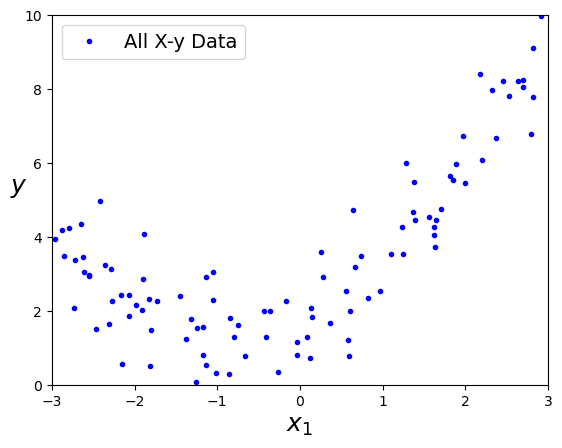

OK


In [2]:
# Run code: Qb(part I)
# NOTE: modified code from [GITHOML], 04_training_linear_models.ipynb

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(42)

def GenerateData():
    m = 100
    X = 6 * np.random.rand(m, 1) - 3
    y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)
    return X, y

X, y = GenerateData()
X_train, X_val, y_train, y_val = \
    train_test_split( \
        X[:50], y[:50].ravel(), \
        test_size=0.5, \
        random_state=10)

print("X_train.shape=",X_train.shape)
print("X_val  .shape=",X_val.shape)
print("y_train.shape=",y_train.shape)
print("y_val  .shape=",y_val.shape)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled   = poly_scaler.transform(X_val)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
plt.plot(X, y, "b.", label="All X-y Data")
plt.xlabel("$x_1$", fontsize=18, )
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

print('OK')      

Part 1 is about generating some synthetic data for the polynomial regression, which happens in the GenerateData() function. The data is then splot into taining and validation sets. In a pipeline a polynomial featurea are created using PolynomaialFeatures with a degree of 90, which makes the model cabeable of capturing very complex patterns. And a standard scaler is also used in the pipeline. Lastly it prints the data. 

In [3]:
# Run code: Qb(part II)

def Train(X_train, y_train, X_val, y_val, n_epochs, verbose=False):
    print("Training...n_epochs=",n_epochs)
    
    train_errors, val_errors = [], []
    
    sgd_reg = SGDRegressor(max_iter=1,
                           penalty=None,
                           eta0=0.0005,
                           warm_start=True,
                           early_stopping=False,
                           learning_rate="constant",
                           tol=0,
                           random_state=42)

    for epoch in range(n_epochs):
        
        sgd_reg.fit(X_train, y_train)
        
        y_train_predict = sgd_reg.predict(X_train)
        y_val_predict   = sgd_reg.predict(X_val)

        mse_train=mean_squared_error(y_train, y_train_predict)
        mse_val  =mean_squared_error(y_val  , y_val_predict)

        train_errors.append(mse_train)
        val_errors  .append(mse_val)
        if verbose:
            print(f"  epoch={epoch:4d}, mse_train={mse_train:4.2f}, mse_val={mse_val:4.2f}")

    return train_errors, val_errors

n_epochs = 500
train_errors, val_errors = Train(X_train_poly_scaled, y_train, X_val_poly_scaled, y_val, n_epochs, True)

print('OK')

Training...n_epochs= 500
  epoch=   0, mse_train=11.85, mse_val=14.58
  epoch=   1, mse_train=11.51, mse_val=14.10
  epoch=   2, mse_train=11.15, mse_val=13.60
  epoch=   3, mse_train=10.81, mse_val=13.13
  epoch=   4, mse_train=10.49, mse_val=12.70
  epoch=   5, mse_train=10.18, mse_val=12.30
  epoch=   6, mse_train=9.88, mse_val=11.92
  epoch=   7, mse_train=9.60, mse_val=11.56
  epoch=   8, mse_train=9.33, mse_val=11.23
  epoch=   9, mse_train=9.07, mse_val=10.91
  epoch=  10, mse_train=8.82, mse_val=10.62
  epoch=  11, mse_train=8.59, mse_val=10.34
  epoch=  12, mse_train=8.36, mse_val=10.07
  epoch=  13, mse_train=8.14, mse_val=9.82
  epoch=  14, mse_train=7.93, mse_val=9.57
  epoch=  15, mse_train=7.72, mse_val=9.34
  epoch=  16, mse_train=7.53, mse_val=9.12
  epoch=  17, mse_train=7.34, mse_val=8.91
  epoch=  18, mse_train=7.16, mse_val=8.71
  epoch=  19, mse_train=6.98, mse_val=8.52
  epoch=  20, mse_train=6.81, mse_val=8.33
  epoch=  21, mse_train=6.65, mse_val=8.15
  epoch=  

c:\Users\ninat\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\ninat\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\ninat\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\ninat\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\ninat\anaconda3\Lib\site-packages\sklearn\linea

  epoch= 125, mse_train=1.19, mse_val=1.97
  epoch= 126, mse_train=1.18, mse_val=1.95
  epoch= 127, mse_train=1.17, mse_val=1.94
  epoch= 128, mse_train=1.16, mse_val=1.92
  epoch= 129, mse_train=1.15, mse_val=1.91
  epoch= 130, mse_train=1.14, mse_val=1.89
  epoch= 131, mse_train=1.13, mse_val=1.88
  epoch= 132, mse_train=1.12, mse_val=1.87
  epoch= 133, mse_train=1.11, mse_val=1.85
  epoch= 134, mse_train=1.10, mse_val=1.84
  epoch= 135, mse_train=1.09, mse_val=1.83
  epoch= 136, mse_train=1.08, mse_val=1.81
  epoch= 137, mse_train=1.07, mse_val=1.80
  epoch= 138, mse_train=1.06, mse_val=1.79
  epoch= 139, mse_train=1.06, mse_val=1.78
  epoch= 140, mse_train=1.05, mse_val=1.77
  epoch= 141, mse_train=1.04, mse_val=1.76
  epoch= 142, mse_train=1.03, mse_val=1.74
  epoch= 143, mse_train=1.02, mse_val=1.73
  epoch= 144, mse_train=1.02, mse_val=1.72
  epoch= 145, mse_train=1.01, mse_val=1.71
  epoch= 146, mse_train=1.00, mse_val=1.70
  epoch= 147, mse_train=0.99, mse_val=1.69
  epoch= 14

c:\Users\ninat\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\ninat\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\ninat\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\ninat\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\ninat\anaconda3\Lib\site-packages\sklearn\linea

  epoch= 254, mse_train=0.66, mse_val=1.36
  epoch= 255, mse_train=0.66, mse_val=1.36
  epoch= 256, mse_train=0.66, mse_val=1.36
  epoch= 257, mse_train=0.66, mse_val=1.36
  epoch= 258, mse_train=0.65, mse_val=1.36
  epoch= 259, mse_train=0.65, mse_val=1.36
  epoch= 260, mse_train=0.65, mse_val=1.36
  epoch= 261, mse_train=0.65, mse_val=1.36
  epoch= 262, mse_train=0.65, mse_val=1.36
  epoch= 263, mse_train=0.65, mse_val=1.36
  epoch= 264, mse_train=0.65, mse_val=1.36
  epoch= 265, mse_train=0.65, mse_val=1.37
  epoch= 266, mse_train=0.65, mse_val=1.37
  epoch= 267, mse_train=0.64, mse_val=1.37
  epoch= 268, mse_train=0.64, mse_val=1.37
  epoch= 269, mse_train=0.64, mse_val=1.37
  epoch= 270, mse_train=0.64, mse_val=1.37
  epoch= 271, mse_train=0.64, mse_val=1.37
  epoch= 272, mse_train=0.64, mse_val=1.37
  epoch= 273, mse_train=0.64, mse_val=1.37
  epoch= 274, mse_train=0.64, mse_val=1.38
  epoch= 275, mse_train=0.64, mse_val=1.38
  epoch= 276, mse_train=0.64, mse_val=1.38
  epoch= 27

c:\Users\ninat\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\ninat\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\ninat\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\ninat\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\ninat\anaconda3\Lib\site-packages\sklearn\linea

  epoch= 404, mse_train=0.56, mse_val=1.70
  epoch= 405, mse_train=0.56, mse_val=1.70
  epoch= 406, mse_train=0.56, mse_val=1.70
  epoch= 407, mse_train=0.56, mse_val=1.71
  epoch= 408, mse_train=0.56, mse_val=1.71
  epoch= 409, mse_train=0.56, mse_val=1.71
  epoch= 410, mse_train=0.56, mse_val=1.72
  epoch= 411, mse_train=0.56, mse_val=1.72
  epoch= 412, mse_train=0.56, mse_val=1.72
  epoch= 413, mse_train=0.56, mse_val=1.73
  epoch= 414, mse_train=0.56, mse_val=1.73
  epoch= 415, mse_train=0.56, mse_val=1.73
  epoch= 416, mse_train=0.56, mse_val=1.74
  epoch= 417, mse_train=0.56, mse_val=1.74
  epoch= 418, mse_train=0.56, mse_val=1.74
  epoch= 419, mse_train=0.56, mse_val=1.74
  epoch= 420, mse_train=0.56, mse_val=1.75
  epoch= 421, mse_train=0.56, mse_val=1.75
  epoch= 422, mse_train=0.56, mse_val=1.75
  epoch= 423, mse_train=0.56, mse_val=1.76
  epoch= 424, mse_train=0.56, mse_val=1.76
  epoch= 425, mse_train=0.55, mse_val=1.76
  epoch= 426, mse_train=0.55, mse_val=1.77
  epoch= 42

c:\Users\ninat\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\ninat\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\ninat\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\ninat\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\ninat\anaconda3\Lib\site-packages\sklearn\linea

Part 2 is about training the model. The Train function performs stochastic gradient descent with some parameters. The function iterates over number of epochs. Every iteration/epoch updates the model and calculates the MSE for both the training and validation set. The MSE values are added to train_errors and val_errors. 
<br>
mse_train is the MSE of the model's predictions on the training dataset. It measures how well the model fits the training data.
<br>
mse_val on the other hand is the MSE of the models' prediction og the validation dataset. It measures how well the model generalizes. 

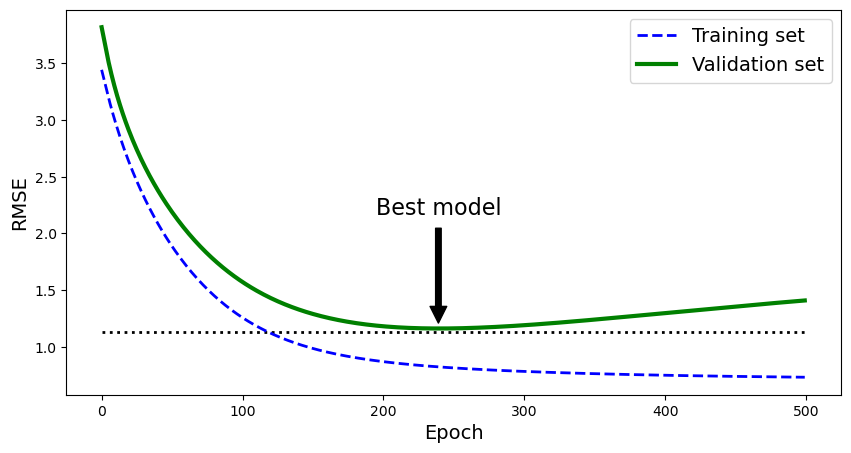

OK


In [4]:
# Run code: Qb(part III)

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.figure(figsize=(10,5))
plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(train_errors), "b--", linewidth=2, label="Training set")
plt.plot(np.sqrt(val_errors), "g-", linewidth=3, label="Validation set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

print('OK')

In part 3 the code finds the epoch with the lowest validation RMSE using np.argmin(val_errors) and calculates the corresponding RMSE value. The rest of the code is about plotting the training and validation RMSE. This plot visualizes how the RMSE changes over epochs during training. 
From the plot it is seen that the best epoch is between 200 and 300. 

### Qc)  Early Stopping

Early stopping is a technique used to prevent overfitting. The idea is to monitor a models performance on a validation set during training and stop training when the performance starts to degrade. This helps to find a balance between model complexity and generalization performance. 

To implement an early stopping to the polynomal regression there should be an varable that holds the validation error, and stops when this starts to increase instead of descrease. This could be implementet with an if else statement.
<br>
``` 
    if val_error < best_val_error:
        best_val_error = val_error  
        best_epoch = epoch 
    else:
        break
``` 

### Qd) Explain the Polynomial RMSE-Capacity plot


What does the x-axis _Capacity_ and y-axis _RMSE_ represent?

Try increasing the model capacity. What happens when you do plots for `degrees` larger than around 10? Relate this with what you found via Qa+b in `capacity_under_overfitting.ipynb`.

Iterating...degrees= range(1, 8)
  degree=   1, rmse_training=0.48, rmse_cv=0.64
  degree=   2, rmse_training=0.17, rmse_cv=0.24
  degree=   3, rmse_training=0.11, rmse_cv=0.14
  degree=   4, rmse_training=0.11, rmse_cv=0.21
  degree=   5, rmse_training=0.10, rmse_cv=0.31
  degree=   6, rmse_training=0.10, rmse_cv=0.34
  degree=   7, rmse_training=0.10, rmse_cv=0.44


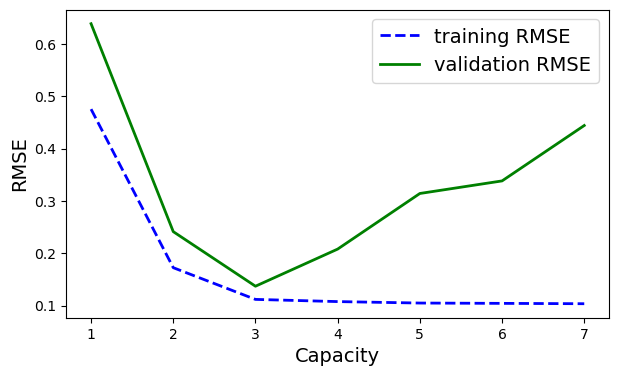

OK


In [2]:
# Run and review this code
# NOTE: modified code from [GITHOML], 04_training_linear_models.ipynb

%matplotlib inline

from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

def GenerateData():
    n_samples = 30
    #degrees = [1, 4, 15]
    degrees = range(1,8)

    X = np.sort(np.random.rand(n_samples))
    y = true_fun(X) + np.random.randn(n_samples) * 0.1
    return X, y, degrees

np.random.seed(0)
X, y, degrees  = GenerateData()

print("Iterating...degrees=",degrees)
capacities, rmses_training, rmses_validation= [], [], []
for i in range(len(degrees)):
    d=degrees[i]
    
    polynomial_features = PolynomialFeatures(degree=d, include_bias=False)
    
    linear_regression = LinearRegression()
    pipeline = Pipeline([
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression)
        ])
    
    Z = X[:, np.newaxis]
    pipeline.fit(Z, y)
    
    p = pipeline.predict(Z)
    train_rms = mean_squared_error(y,p)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, Z, y, scoring="neg_mean_squared_error", cv=10)
    score_mean = -scores.mean()
    
    rmse_training=sqrt(train_rms)
    rmse_validation=sqrt(score_mean)
    
    print(f"  degree={d:4d}, rmse_training={rmse_training:4.2f}, rmse_cv={rmse_validation:4.2f}")
    
    capacities      .append(d)
    rmses_training  .append(rmse_training)
    rmses_validation.append(rmse_validation)
    
plt.figure(figsize=(7,4))
plt.plot(capacities, rmses_training,  "b--", linewidth=2, label="training RMSE")
plt.plot(capacities, rmses_validation,"g-",  linewidth=2, label="validation RMSE")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Capacity", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

print('OK')

The RMSE-Capacity plot illustrates the relationship between the models capacity and the Root Mean Square Error for both the training data and validation data.<br>
As the models capacity is low it it too simple to capture the underlying patterns in the data, and thereby the error is high in both dataset indicating underfitting. <br>
Beyond capacity 3 the models capacity becomes too hight and it starts fitting the noise in the training data, causing the validation error to rise. This is an indication of overfitting. <br>
At capacity 3 the model validation error is at its lowest indication that it is capable of capturing the patterns in the data and is best at genealizing at this point. 
This plot is a great example of the plot at the start of the exercise as it shows the underfitting, overfitting and sweetspot very clearly. 
<br>
If we try to plot with 15 degress as an example, we get this result:
<br>
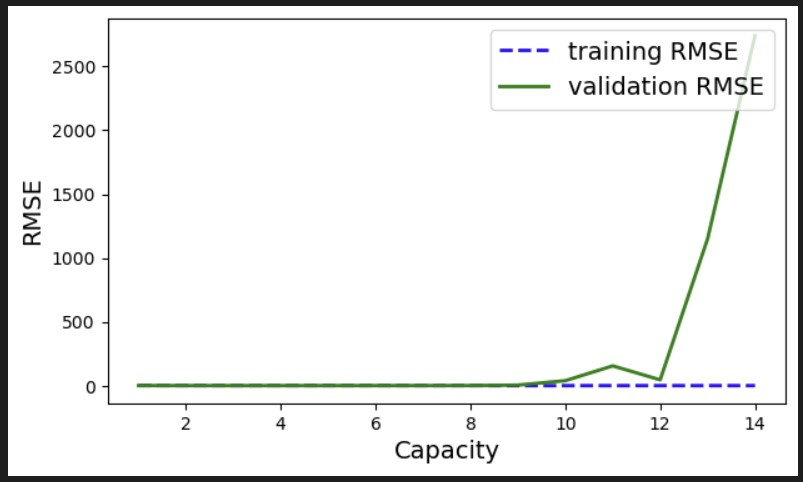
<br>
It is clearly shown that there is way too many degrees and the result is an overfitted model. It doesn't deviate from the training data and captures every noise, which result in very bad generalization.